In [1]:
# pip install --upgrade numpy pandas

In [193]:
# pip uninstall numpy
# # pip install numpy

In [8]:
# !pip uninstall numpy -y

In [9]:
# import numpy as np

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('datasets/Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replacing blanks with 0 as tenure is 0 and no total charges are recorded 

In [12]:
df['TotalCharges'] = df['TotalCharges'].replace(" ","0")
df['TotalCharges'] = df['TotalCharges'].astype("float")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
df.isnull().sum().sum()

0

In [18]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [20]:
df.duplicated().sum()

0

In [22]:
df['customerID'].duplicated().sum()

0

In [24]:
def conv(value):
    if value == 1:
        return "Yes"
    else:
        return "No"
    
df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

#converted 0 and 1 values to senior citizen to yes/no to make it easier to understand

In [37]:
# df.head(30)

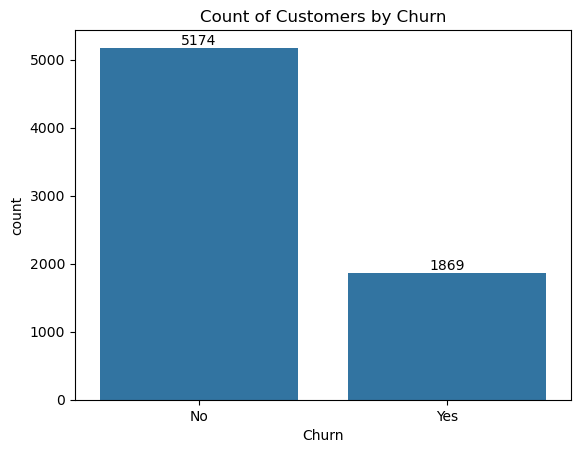

In [67]:
ax = sns.countplot(x = 'Churn',data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

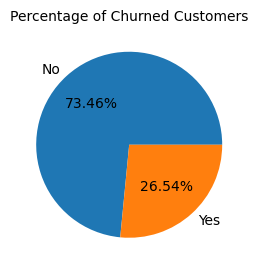

In [73]:
plt.figure(figsize =(3,4))
gb = df.groupby("Churn").agg({'Churn':"count"})
# gb
plt.pie(gb['Churn'],labels = gb.index,autopct = "%1.2f%%")
plt.title("Percentage of Churned Customers",fontsize=10)
plt.show()

# from given pie chart we can conclude that 26.54% of our customers have churned out.
# let's explore the reason behind it 

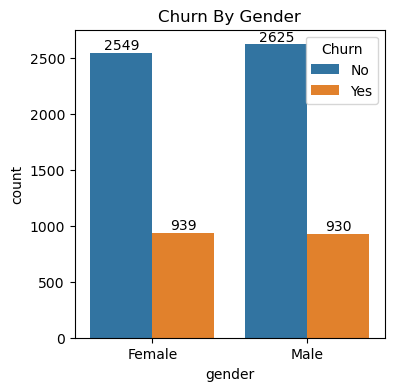

In [191]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x = df['gender'],data=df, hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churn By Gender",fontsize = 12)
plt.show()

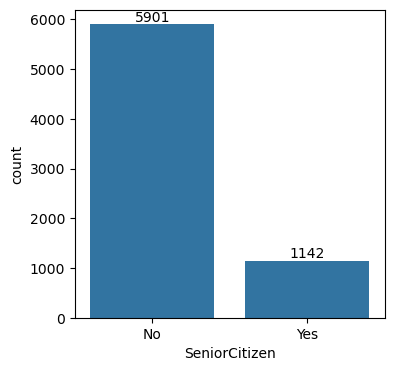

In [129]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x = df['SeniorCitizen'] , data = df)
ax.bar_label(ax.containers[0])
plt.show()

C:\Users\91946\AppData\Local\Temp\ipykernel_4144\1609558650.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, percentages.iloc[i, :].cumsum()[j] - percentages.iloc[i, j] / 2,


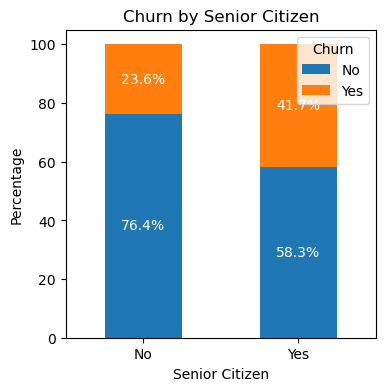

In [119]:
counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()

# Calculate percentages
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Create a stacked bar chart
percentages.plot(kind='bar', stacked=True, figsize=(4, 4))

# Add labels for percentage
for i in range(percentages.shape[0]):
    for j in range(percentages.shape[1]):
        plt.text(i, percentages.iloc[i, :].cumsum()[j] - percentages.iloc[i, j] / 2,
                 f"{percentages.iloc[i, j]:.1f}%", ha='center', va='center', color='white')

plt.title("Churn by Senior Citizen", fontsize=12)
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.legend(title='Churn', loc='upper right')
plt.show()

# Comparative a greater percentage of people in senior citizen category have churned 

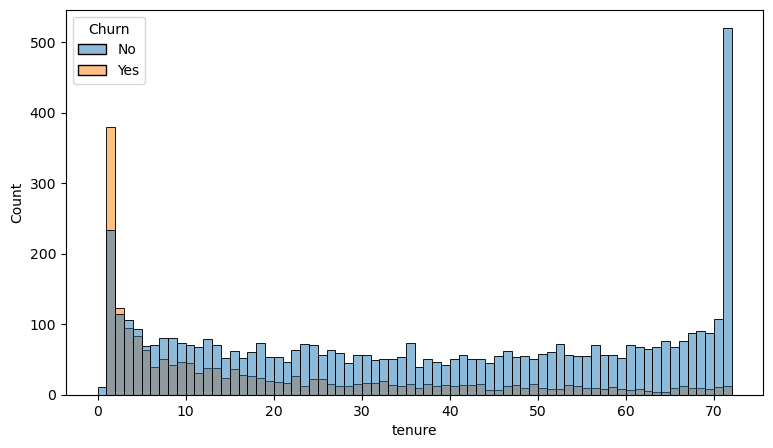

In [151]:
plt.figure(figsize = (9,5))
sns.histplot(x = df['tenure'],data = df,bins = 72,hue = df['Churn'])
plt.show()

# People who have used have our services for a long time have stayed and people who have used our services for 1 or 2 month has churned out

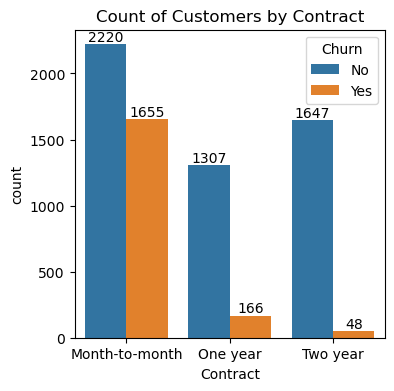

In [189]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = df['Contract'],data = df,hue = df['Churn'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of Customers by Contract")
plt.show()

# People who have month to month Contract are likely to churn then from those who have 1 or 2 years of contract 

In [165]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

C:\Users\91946\AppData\Local\Temp\ipykernel_4144\548403149.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend(title='Churn')
C:\Users\91946\AppData\Local\Temp\ipykernel_4144\548403149.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend(title='Churn')
C:\Users\91946\AppData\Local\Temp\ipykernel_4144\548403149.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend(title='Churn')
C:\Users\91946\AppData\Local\Temp\ipykernel_4144\548403149.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored wh

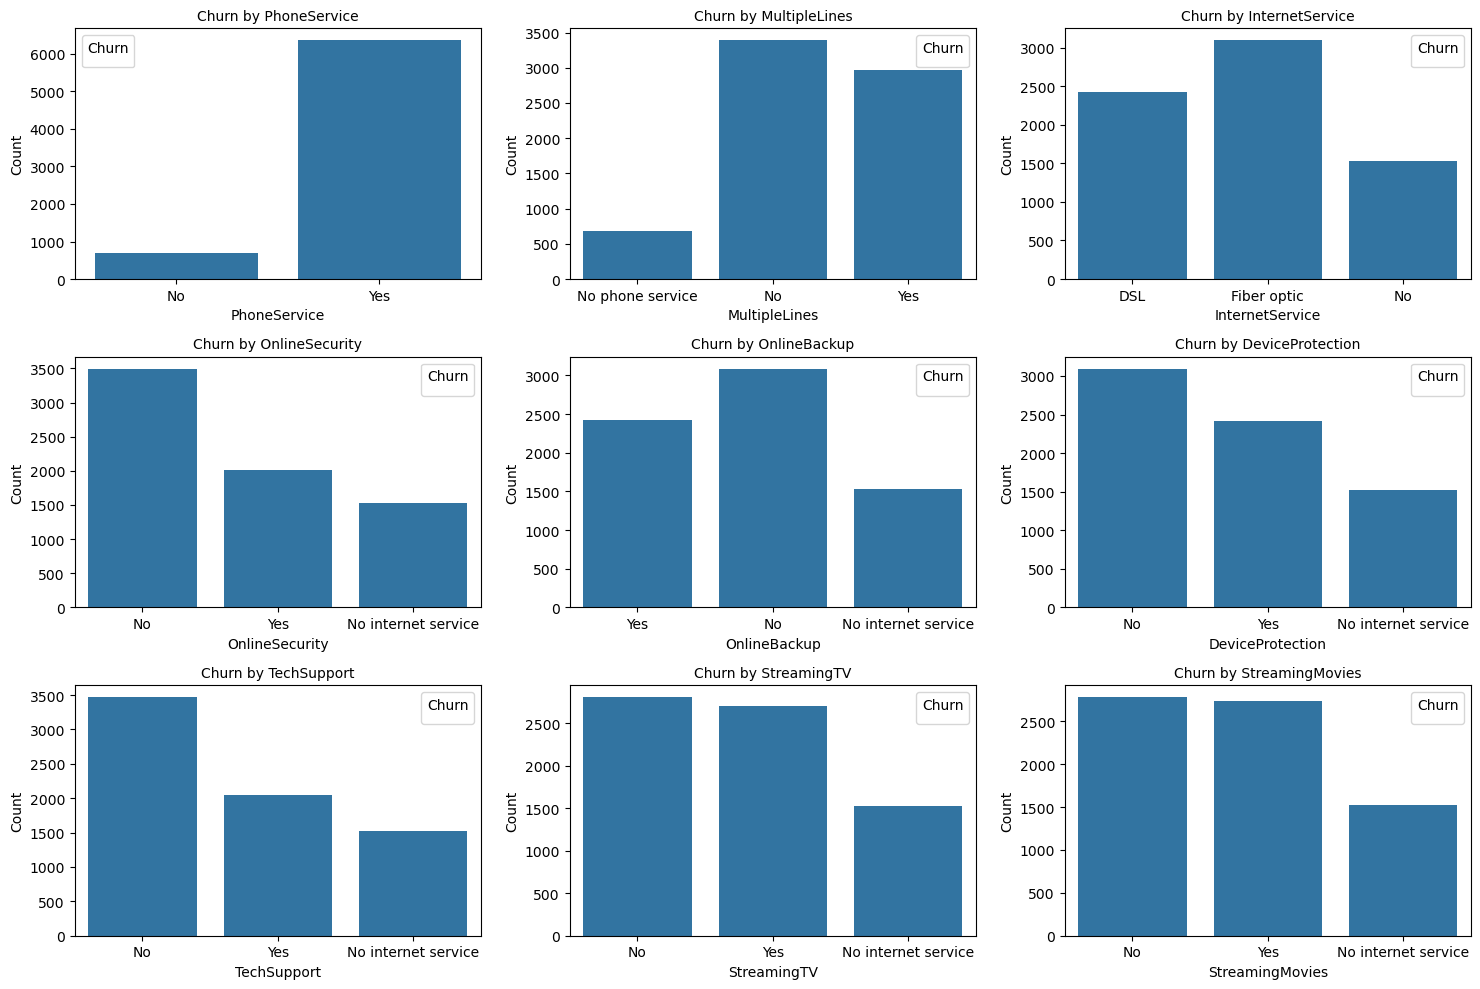

In [171]:
# List of features to plot
features = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Set up the number of subplots
n_features = len(features)
n_cols = 3  # Number of columns for the subplot layout
n_rows = (n_features + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Loop through features and create a countplot for each
for i, feature in enumerate(features):
    sns.countplot(x=feature, data=df, ax=axes[i])
    axes[i].set_title(f"Churn by {feature}", fontsize=10)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Count")
    axes[i].legend(title='Churn')

# Hide any unused subplots
for j in range(i + 1, n_rows * n_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

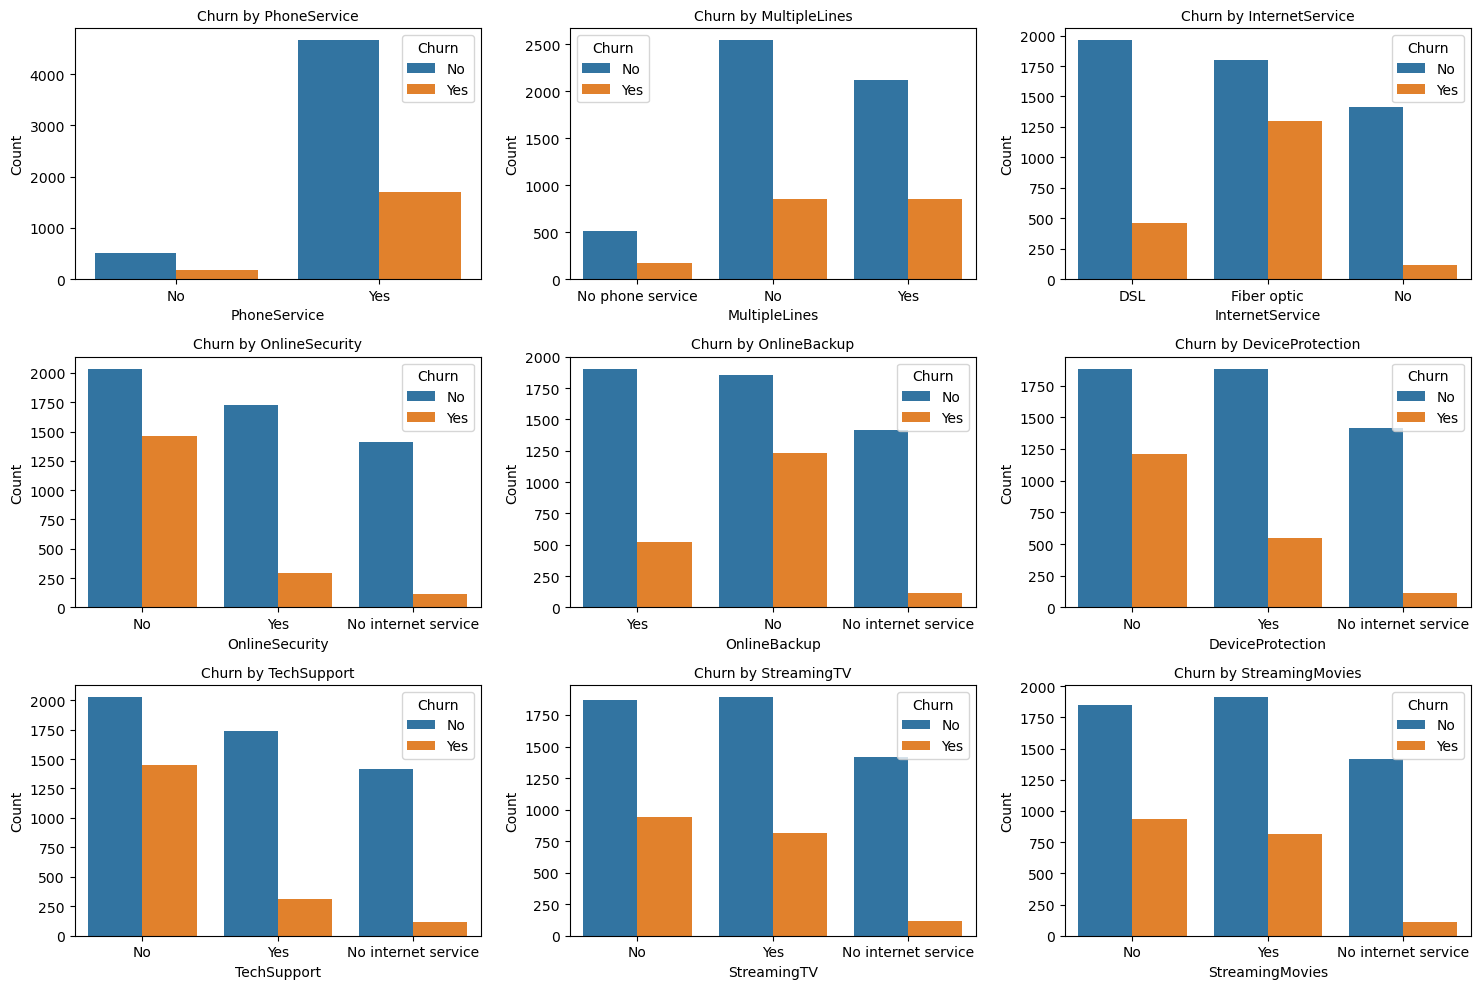

In [169]:
# List of features to plot
features = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Set up the number of subplots
n_features = len(features)
n_cols = 3  # Number of columns for the subplot layout
n_rows = (n_features + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Loop through features and create a countplot for each
for i, feature in enumerate(features):
    sns.countplot(x=feature, data=df, hue='Churn', ax=axes[i])
    axes[i].set_title(f"Churn by {feature}", fontsize=10)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Count")
    axes[i].legend(title='Churn')

# Hide any unused subplots
for j in range(i + 1, n_rows * n_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# The charts illustrate the counts of customers who churned and those who did not, across various categories like PhoneService, InternetService, OnlineSecurity, and other services. In general, churn appears higher for customers who lack certain services (e.g., online security or tech support) or those using fiber optic internet compared to other service types.

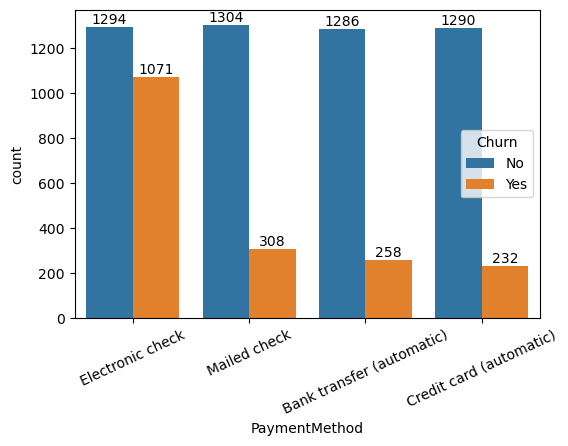

In [199]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = df['PaymentMethod'],data = df , hue = df['Churn'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation = 25)
plt.show()

# Customer is likely to Churn when they are using electronic check as payment method 